In [33]:
import pandas as pd
data = pd.read_json("loan_approval_dataset.json")
data.head()


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [34]:
print(data.describe(include='all'))
print(data.isnull().sum())

                   Id        Income            Age     Experience  \
count   252000.000000  2.520000e+05  252000.000000  252000.000000   
unique            NaN           NaN            NaN            NaN   
top               NaN           NaN            NaN            NaN   
freq              NaN           NaN            NaN            NaN   
mean    126000.500000  4.997117e+06      49.954071      10.084437   
std      72746.278255  2.878311e+06      17.063855       6.002590   
min          1.000000  1.031000e+04      21.000000       0.000000   
25%      63000.750000  2.503015e+06      35.000000       5.000000   
50%     126000.500000  5.000694e+06      50.000000      10.000000   
75%     189000.250000  7.477502e+06      65.000000      15.000000   
max     252000.000000  9.999938e+06      79.000000      20.000000   

       Married/Single House_Ownership Car_Ownership Profession           CITY  \
count          252000          252000        252000     252000         252000   
unique   

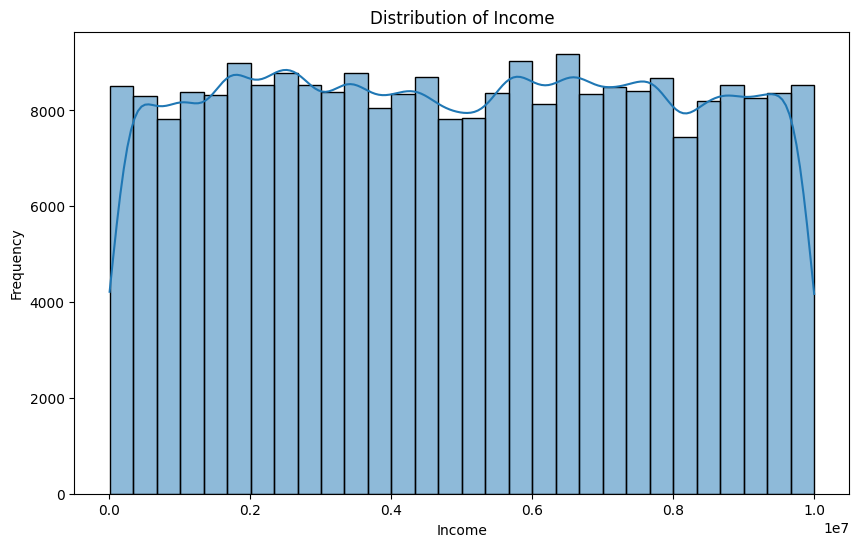

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


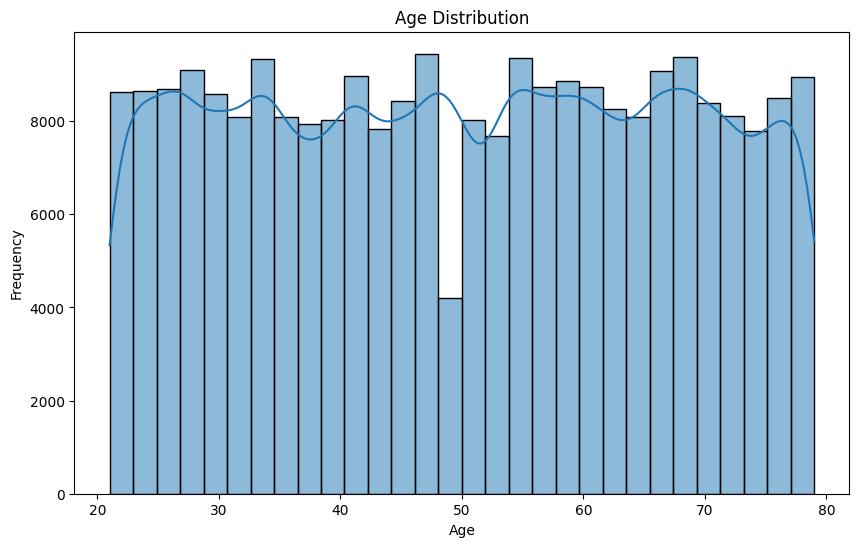

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


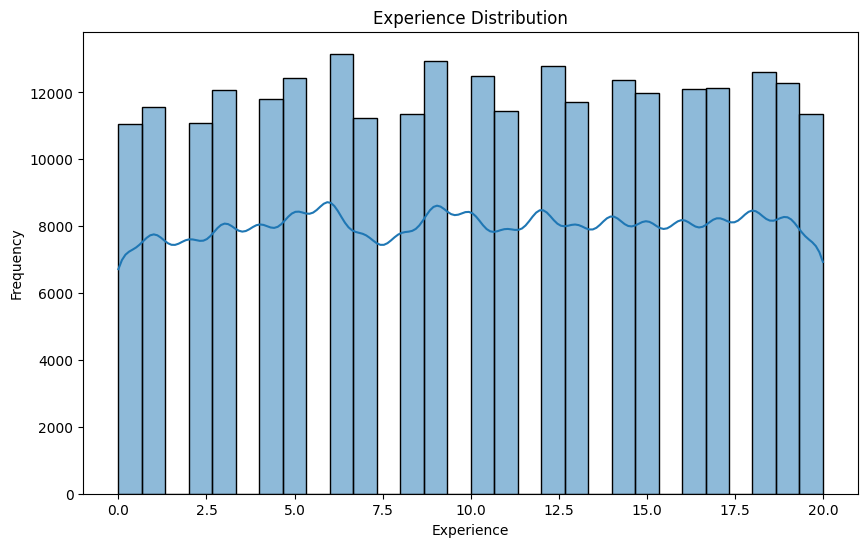

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Experience'], kde=True, bins=30)
plt.title('Experience Distribution')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()


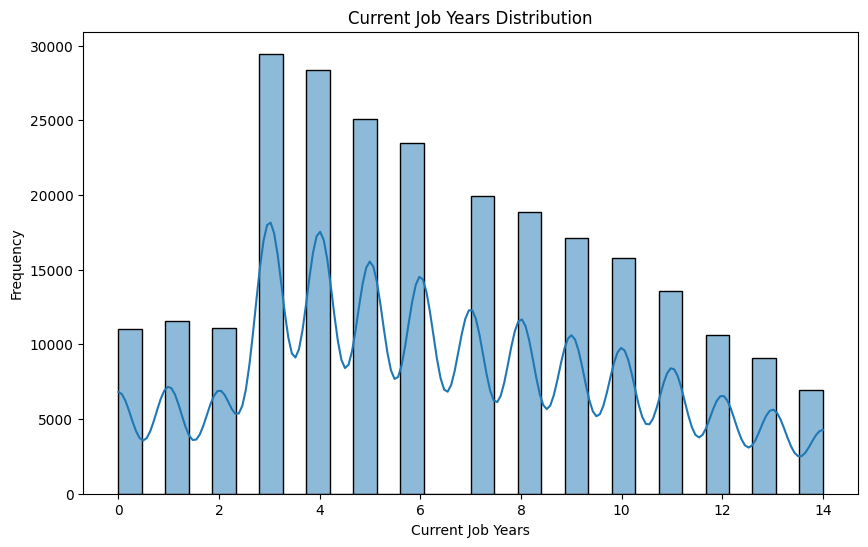

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data['CURRENT_JOB_YRS'], kde=True, bins=30)
plt.title('Current Job Years Distribution')
plt.xlabel('Current Job Years')
plt.ylabel('Frequency')
plt.show()


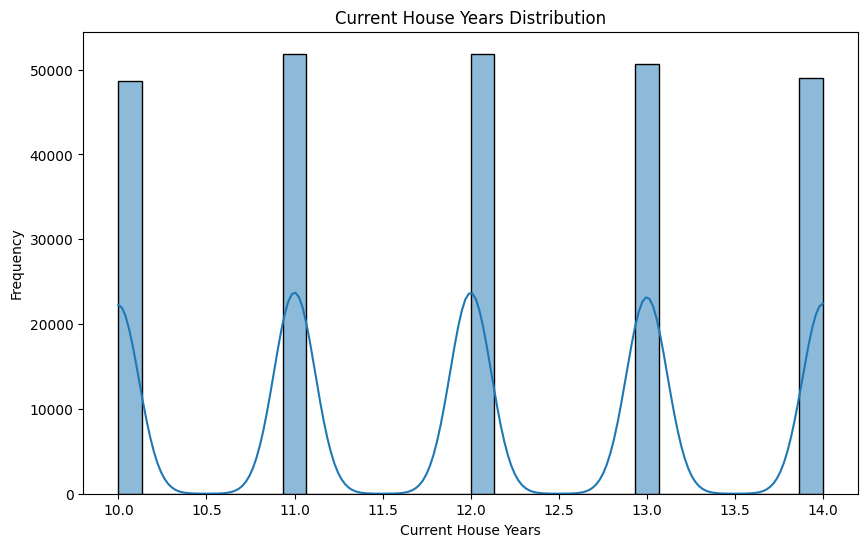

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data['CURRENT_HOUSE_YRS'], kde=True, bins=30)
plt.title('Current House Years Distribution')
plt.xlabel('Current House Years')
plt.ylabel('Frequency')
plt.show()


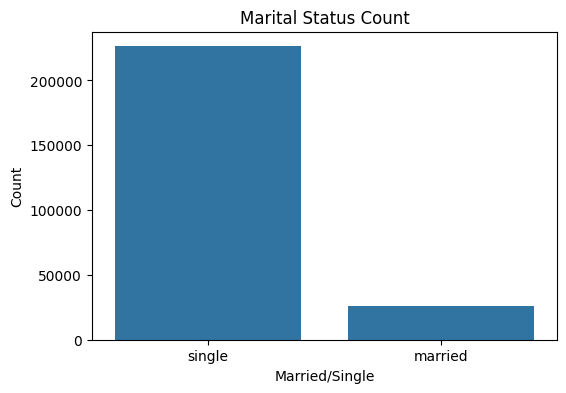

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Married/Single', data=data)
plt.title('Marital Status Count')
plt.xlabel('Married/Single')
plt.ylabel('Count')
plt.show()


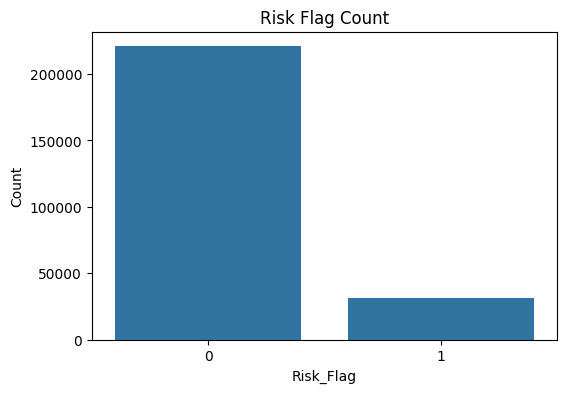

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Risk_Flag', data=data)
plt.title('Risk Flag Count')
plt.xlabel('Risk_Flag')
plt.ylabel('Count')
plt.show()


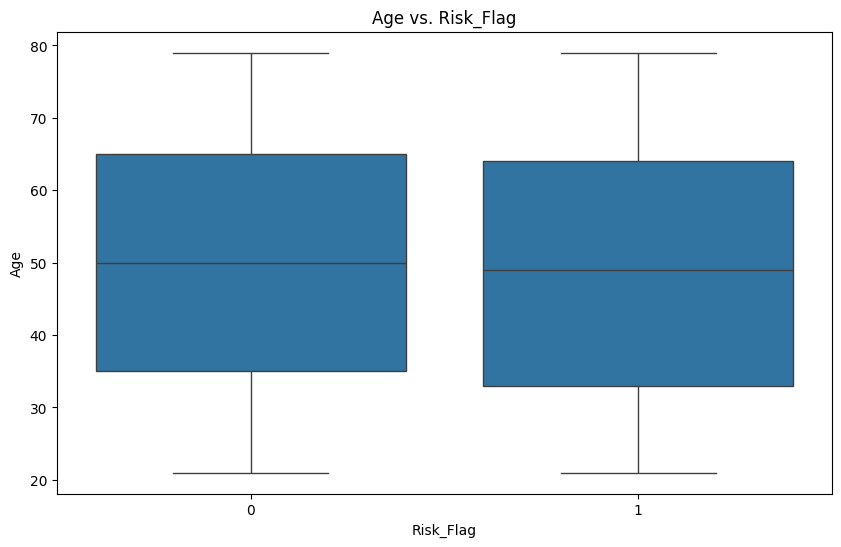

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk_Flag', y='Age', data=data)
plt.title('Age vs. Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Age')
plt.show()


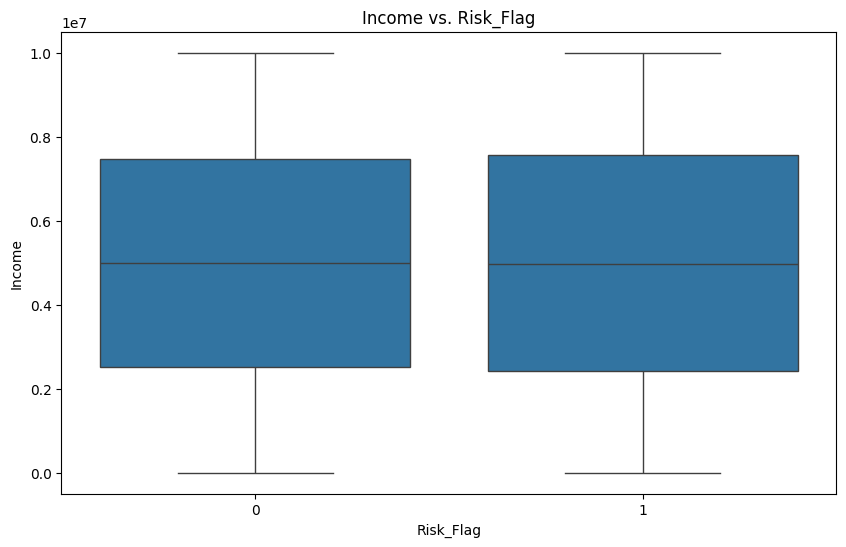

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk_Flag', y='Income', data=data)
plt.title('Income vs. Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Income')
plt.show()


In [44]:
data['CURRENT_JOB_YRS'].fillna(data['CURRENT_JOB_YRS'].median(), inplace=True)
data['CURRENT_HOUSE_YRS'].fillna(data['CURRENT_HOUSE_YRS'].median(), inplace=True)


In [45]:
data = pd.get_dummies(data, columns=['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'], drop_first=True)


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [47]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Id', 'Risk_Flag'])
y = data['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
results = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

results_df = pd.DataFrame([results], index=['Random Forest'])
print(results_df)

               Accuracy  Precision    Recall  F1 Score
Random Forest  0.898611   0.602806  0.535903  0.567389


In [49]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [50]:
loaded_model = joblib.load('random_forest_model.pkl')
y_pred_loaded = loaded_model.predict(X_test)

accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
precision_loaded = precision_score(y_test, y_pred_loaded)
recall_loaded = recall_score(y_test, y_pred_loaded)
f1_loaded = f1_score(y_test, y_pred_loaded)

print('Random Forest Model Evaluation:')
print(f'Accuracy (Loaded Model): {accuracy_loaded}')
print(f'Precision (Loaded Model): {precision_loaded}')
print(f'Recall (Loaded Model): {recall_loaded}')
print(f'F1 Score (Loaded Model): {f1_loaded}')

Random Forest Model Evaluation:
Accuracy (Loaded Model): 0.8986111111111111
Precision (Loaded Model): 0.6028062601187264
Recall (Loaded Model): 0.5359027666719974
F1 Score (Loaded Model): 0.5673890958347443


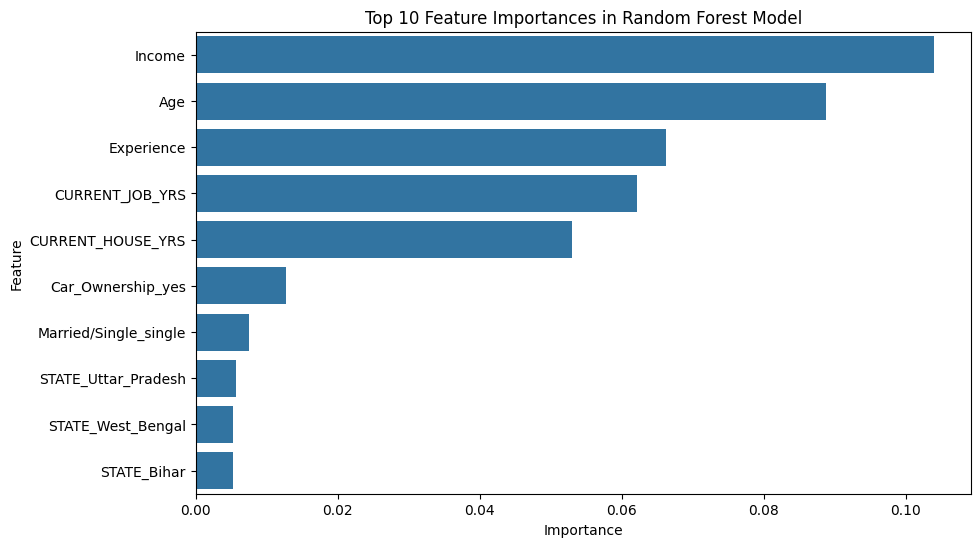

In [51]:
importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
